In [1]:
# Reqired Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [2]:
# Helper functions
def split(Data):
    return Data[:,:-1],Data[:,-1]


In [3]:
# Perceptron class

class Perceptron:
    def __init__(self, wts, max_epoch):

        # number of epochs, weights and steps for convergence
        self.wts   = wts    
        self.max_epoch = max_epoch
        self.steps = 0


    def fit(self,x_train,y_train):

        # initialize weights
        set_of_Wts = {tuple(self.wts)}

        # Plot the weights
        self.scatter_data(x_train,y_train)

        X = np.ones(shape = (x_train.shape[0],1+x_train.shape[1]))
        X[:, :-1] = x_train 
        x_train = X
        

        for i in range(self.max_epoch):
            updates = 0
            
            for j in range(len(x_train)):

                # forward pass
                z = np.matmul(self.wts,x_train[j].T)
                A = 1 if z > 0 else 0 
    
                if A != y_train[j]:
                    self.plot_Decision_boundary(self.steps)
                    updates += 1                     
                    self.steps += 1

                    # weight update
                    self.wts = self.wts + (y_train[j]-A)*x_train[j] 
                    
                    if tuple(self.wts) in set_of_Wts:
                        """
                            if weight repeats then perceptron can not 
                            learn fromthe given input samples as the 
                            same set of weights will repeat again 
                        """
                        return False
                    else:
                        set_of_Wts.add(tuple(self.wts.tolist()))
                    
                #    Convergence
            if updates == 0:
                self.plot_Decision_boundary(self.steps)
                plt.show()
                return True
        
        return False
        

    def predict(self,x_test):

        # Prediction function 
        X = np.ones(shape = (x_test.shape[0],1+x_test.shape[1]))
        X[ :, :-1] = x_test 
        x_test = X
        
        predictions = []
        
        for j in range(len(x_test)):
            z = np.matmul(self.wts,x_test[j].T)
            A = 1 if z>0 else 0 
            predictions.append(A)

        # Final predictions
        return np.array(predictions).astype(np.int8)
    
    
    def accuracy(self,pred,act):
        return np.sum(pred == act)/len(act)
    

    def scatter_data(self,x_train,y_train):
        ones_x,ones_y,other_x,other_y = [],[],[],[]

        # Plotting the data
        for i in range(len(y_train)):
            if len(x_train[0]) == 1:
                if y_train[i] == 1:
                    ones_x.append(x_train[i])
                    ones_y.append(0)
                else:
                    other_x.append(x_train[i])
                    other_y.append(0)

            else:    
                if y_train[i] == 1:
                    ones_x.append(x_train[i][0])
                    ones_y.append(x_train[i][1])
                else:
                    other_x.append(x_train[i][0])
                    other_y.append(x_train[i][1])
        
        plt.figure(figsize=(15,10))
        plt.scatter(ones_x,ones_y,marker='x',
                    s=200,label='1',linewidth=5)
        plt.scatter(other_x,other_y,marker='o',
                    s=200,label='0',linewidth=5)


    def plot_Decision_boundary(self,step):

        # Calculate teh decision boundary using weights
        if self.wts.shape[0]==3:
            x_intercept = - self.wts[2]/self.wts[0]
            y_intercept = - self.wts[2]/self.wts[1]

            slope = -x_intercept/y_intercept
        else:
            slope = self.wts[0]
            x_intercept = - self.wts[1]/self.wts[0]
           
        X = np.arange(-10, 10)

        # Plot it
        Y = np.array([slope*x+x_intercept for x in X ])

        plt.gca().plot(X, Y,label="step"+str(step))
        plt.gca().set_xlim(-3, 5)
        plt.gca().set_ylim(-3, 5)
        plt.gca().legend(prop={'size':15})
       

In [4]:
# Input the training data
AND_data = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]])
OR_data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
NOT_data = np.array([[0,1],[1,0]])


In [5]:
# AND

train_x,train_y= split(AND_data)
test_x,test_y = split(AND_data[:]) 

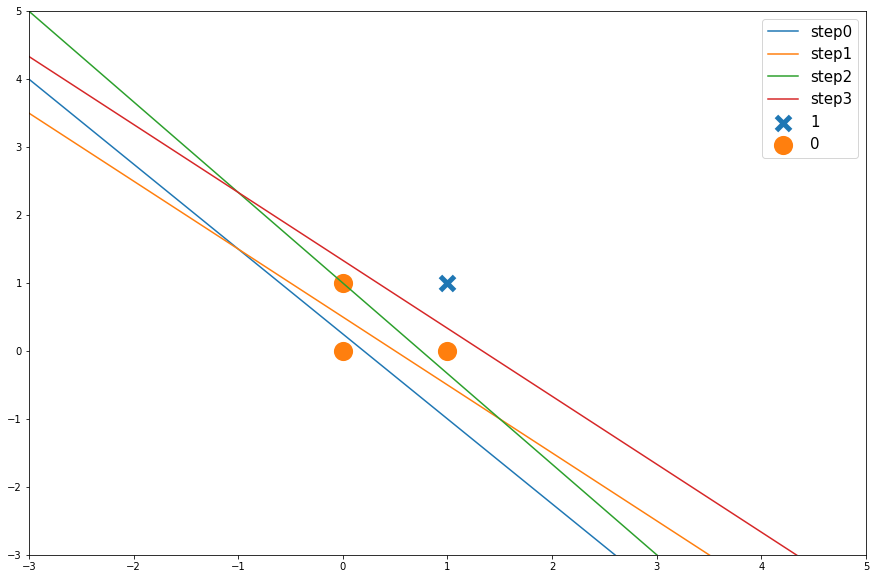

epoch required to converge:  3
final weights:  [ 3.  3. -4.]
predicted: [0 0 0 1] 
actual: [0 0 0 1]


In [6]:
# Random weights
weights= np.array([4,5,-1])
pta_and = Perceptron(weights,max_epoch=100)

flag = pta_and.fit(train_x,train_y)

# Printing test
if not flag:
    print("untrainable")
    print("steps for weight repetetion: ",pta_and.steps)

else:    
    predictions = pta_and.predict(test_x)

    print("epoch required to converge: ",pta_and.steps)
    print("final weights: ",pta_and.wts)

    print('predicted:',predictions,'\nactual:',test_y)

In [7]:
# OR data
train_x,train_y= split(OR_data)
test_x,test_y = split(OR_data[:]) 

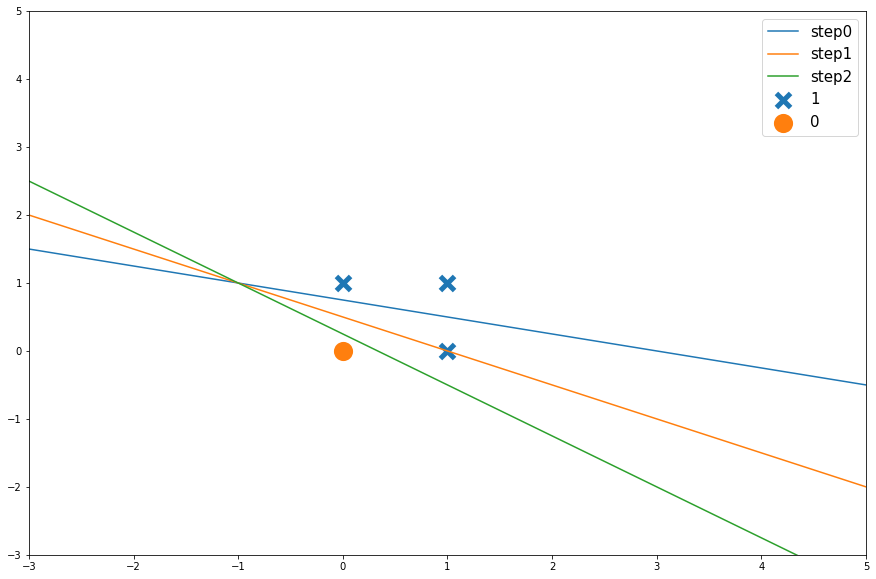

epoch required to converge:  2
final weights:  [ 4.  3. -1.]
predicted: [0 1 1 1] 
actual: [0 1 1 1]


In [8]:
weights= np.array([4,1,-3])
pta_or = Perceptron(weights,max_epoch=100)


flag = pta_or.fit(train_x,train_y)

if not flag:
    print("untrainable")
    print("steps for weight repetetion: ",pta_or.steps)

else:  
    predictions = pta_or.predict(test_x)

    print("epoch required to converge: ",pta_or.steps)
    print("final weights: ",pta_or.wts)

    print('predicted:',predictions,'\nactual:',test_y)

In [9]:
# Not data
train_x,train_y= split(NOT_data)
test_x,test_y = split(NOT_data[:]) 

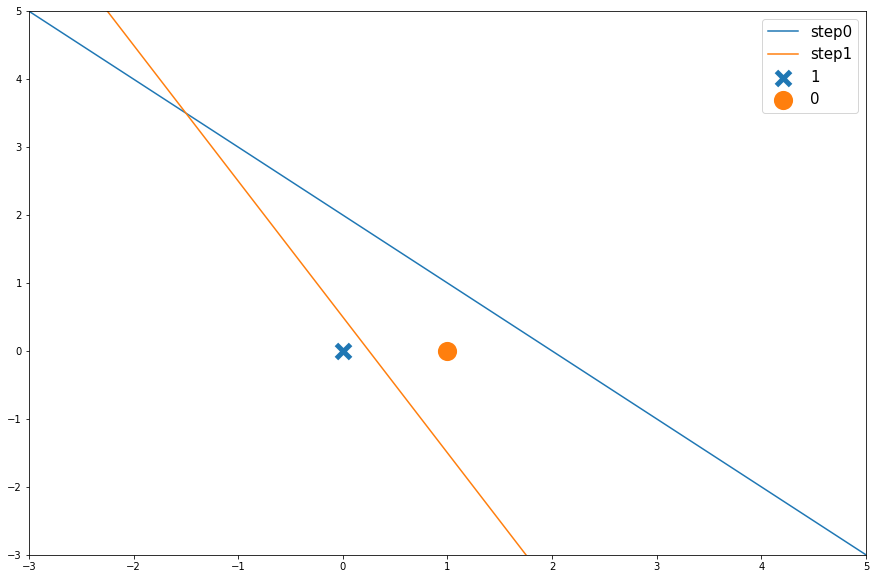

epoch required to converge:  1
final weights:  [-2.  1.]
predicted: [1 0] 
actual: [1 0]


In [10]:
weights = np.array([-1,2])
pta_not = Perceptron(weights,max_epoch=100)

flag = pta_not.fit(train_x,train_y)

if not flag:
    print("untrainable")
    print("steps for weight repetetion: ",pta_not.steps)

else:  
    predictions = pta_not.predict(test_x)

    print("epoch required to converge: ",pta_not.steps)
    print("final weights: ",pta_not.wts)

    print('predicted:',predictions,'\nactual:',test_y)

In [11]:
# XOR data
XOR_data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])

train_x,train_y= split(XOR_data)
test_x,test_y = split(XOR_data[:]) 


/tmp/ipykernel_56625/497432563.py:115: RuntimeWarning: divide by zero encountered in double_scalars
  x_intercept = - self.wts[2]/self.wts[0]
/tmp/ipykernel_56625/497432563.py:126: RuntimeWarning: invalid value encountered in double_scalars
  Y = np.array([slope*x+x_intercept for x in X ])
/tmp/ipykernel_56625/497432563.py:115: RuntimeWarning: invalid value encountered in double_scalars
  x_intercept = - self.wts[2]/self.wts[0]
/tmp/ipykernel_56625/497432563.py:115: RuntimeWarning: divide by zero encountered in double_scalars
  x_intercept = - self.wts[2]/self.wts[0]
/tmp/ipykernel_56625/497432563.py:126: RuntimeWarning: invalid value encountered in double_scalars
  Y = np.array([slope*x+x_intercept for x in X ])
/tmp/ipykernel_56625/497432563.py:115: RuntimeWarning: invalid value encountered in double_scalars
  x_intercept = - self.wts[2]/self.wts[0]
/tmp/ipykernel_56625/497432563.py:115: RuntimeWarning: divide by zero encountered in double_scalars
  x_intercept = - self.wts[2]/self.w

untrainable
steps for weight repetetion:  12


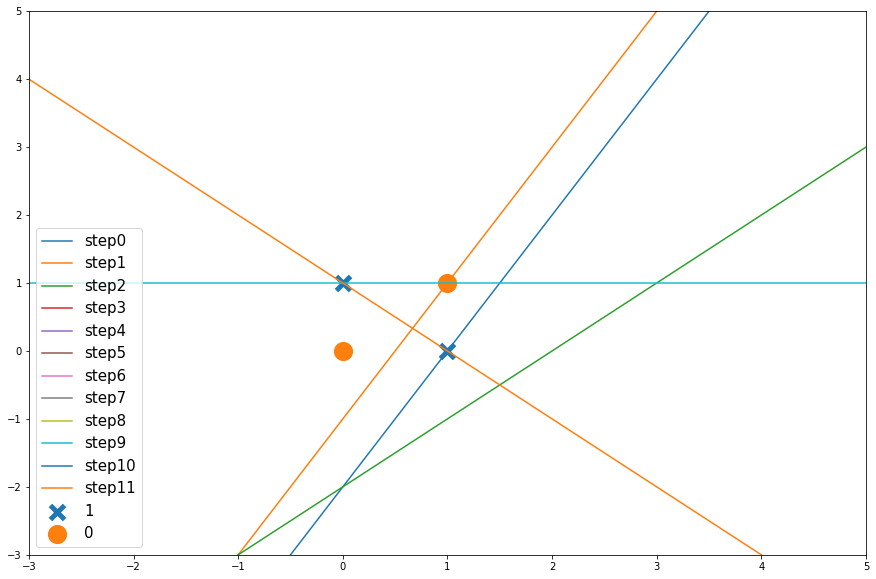

In [12]:
weights = np.array([1,-2,2])
pta_xor = Perceptron(weights,max_epoch=10)

flag = pta_xor.fit(train_x,train_y)

if not flag:
    print("untrainable")
    print("steps for weight repetetion: ",pta_xor.steps)

else:  
    predictions = pta_xor.predict(test_x)

    print("epoch required to converge: ",pta_xor.steps)
    print("final weights: ",pta_xor.wts)

    print('predicted:',predictions,'\nactual:',test_y)